<center>
<font size = 15>
K-Nearest-Neighbor
</font>
</center>
<br>
<center>
<font size = 8>
핀테크 기계학습
</font>
</center>

<br>


<img src = "./img/knn_간단설명.jpg">

<br><br><br>

<div  style="text-align: right">
    <font size = 7 > 19/03/29 이성령 </font>
</div>

## Library Load

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import collections
from matplotlib.colors import LogNorm
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import sys
import numpy as np
from scipy.spatial.distance import cdist
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
np.set_printoptions(threshold=np.inf)

<br>
<center>
<font size= 10  > 
    Gaussian Mixture Model(GMM) </font>
</center>
<br>

<img src = './img/Gaussian_Mixture.PNG'>

<br>

* 확률이 1이 되게 하는 몇개의 봉우리에서 샘플링 할 숫자를 미리 정한다.
* 그 뒤에 각각의 봉우리에서 해당하는 숫자만큼 샘플링을 하게 되면 GMM 만들 수 있다.

<font size= 5  > Red </font>
    
* `mean` = [(0,4) , (0,2), (3,4) , (0.5,1.5) , (1, 2.5)] , `cov` = [np.diag([1.0,1.0])] * 5 , `p` =[ 0.3,0.3,0.2 ,0.1,0.1]

<font size= 5  > Blue </font>

* `mean` = [(-1.,-1) , (3.5 ,-0.5), (3,3) , (3.5,1.5) , (3.0, 1.5)]  , `cov` = [np.diag([1.0,1.0])] * 5  , `p` =[ 0.2,0.3,0.2 ,0.2,0.1]


In [36]:
def mixture_5(mean = None , cov = None , p = None , N = 200 ) :
    X = np.random.choice( list(np.arange(0,len(p))) , size= N , p = p )
    count = np.bincount(X)
    a = np.random.multivariate_normal(mean[0], cov[0], count[0])
    b = np.random.multivariate_normal(mean[1], cov[1], count[1])
    c = np.random.multivariate_normal(mean[2], cov[2], count[2])
    d = np.random.multivariate_normal(mean[3], cov[3], count[3])
    e = np.random.multivariate_normal(mean[4], cov[4], count[4])
    return np.concatenate((a,b,c,d,e) , axis = 0)

In [37]:
train_n = 200

mean = [(0,4) , (0,2), (3,4) , (0.5,1.5) , (1, 2.5)]
cov = [np.diag([1.0,1.0])] * 5
p =[ 0.3,0.3,0.2 ,0.1,0.1]
mix_1 = mixture_5(mean = mean , cov = cov , p =  p , N= train_n)
p =[ 0.2,0.3,0.2 ,0.2,0.1]
mean = [(-1.,-1) , (3.5 ,-0.5), (3,3) , (3.5,1.5) , (3.0, 1.5)]
cov = [np.diag([1.0,1.0])] * 5

mix_2 = mixture_5(mean = mean , cov = cov , p =  p, N= train_n)
train_label = ["red"] * train_n  + ["blue"]  * train_n
total  = np.concatenate((mix_1 , mix_2), axis = 0)

## Figure 1

* GMM 2D 분포 생성과 2D Grid 생성

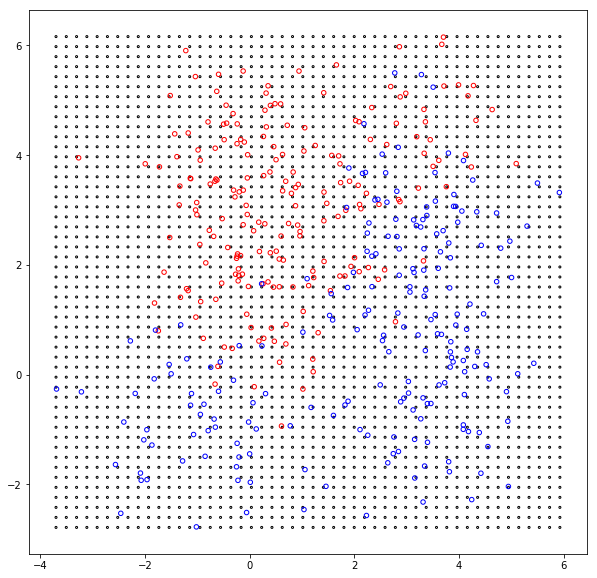

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
x = np.linspace(x_min , x_max , num = 50)
y = np.linspace(y_min, y_max  , num = 50)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=4, facecolors='none', edgecolors= "black"  )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )
plt.show()

## Figure 1.1 Interative Plot

* 1D histogram 과 2D Scatter Plot

In [39]:
XX = np.array([x.ravel(), y.ravel()]).T

total_graph = go.Scatter(
    x = total[:,0],
    y = total[:,1],
    xaxis = 'x',
    yaxis = 'y',
    mode = 'markers',
    marker = dict(color = train_label , size = 5) )
hist_1 = go.Histogram(
    y = total[:,1],
    xaxis = 'x2',
    marker = dict(color = "red"))

hist_2 = go.Histogram(
    x = total[:,0],
    yaxis = 'y2',
    marker = dict(color = "blue"))

grid_scatter = go.Scatter(
    x = XX[:,0],
    y = XX[:,1],
    xaxis = 'x',
    yaxis = 'y',
    mode = 'markers',
    marker = dict(color = "black" , size = 1))



data = [total_graph , hist_1 , hist_2 , grid_scatter]


layout = go.Layout(
    autosize = False,
    xaxis = dict( zeroline = False,
                  domain = [0,0.85],
                  showgrid = False ),
    yaxis = dict( zeroline = False,
                  domain = [0,0.85],
                  showgrid = False),
    xaxis2 = dict(zeroline = False,
                  domain = [0.85,1],
                  showgrid = False),
    yaxis2 = dict(zeroline = False,
                  domain = [0.85,1],
                  showgrid = False),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='2D GMM 1D Histogram')

/usr/local/lib/python3.5/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Figure 2

### Bayes Decision Boundary 만들기

* Gaussian Mixture (EM으로 만든 Decision Boundary)
* score_samples 값은 가중화된 logProb

In [40]:
grid_n = 2000
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[0:(train_n+1), :])
Z = gmm.score_samples(XX)
Z2 = Z.reshape((grid_n,grid_n))
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[train_n: (2*train_n + 1), :])
Z = gmm.score_samples(XX) # 
Z1 = Z.reshape((grid_n,grid_n))

In [41]:
D = Z2 - Z1
D = np.abs(D)
D = np.where(D > 0.009 , 1, 0)

#D[D > 0.00004 ] =  1.0
#D[D > 0 ] = 1.0
#D[D < 0.1 ] = 0
#D[D> 0.0001] = -1e-1000
#D[D < -0.0007] = -1e-10000
#D[D > 0.000001 ] = -1e-10000
# plt.contour(X , Y ,  D ,
#             linewidths  = 3 , linestyles  = "dashed" , 
#             norm=LogNorm(vmin=0.0001, vmax=0.001))  ## 이것이 애매함.

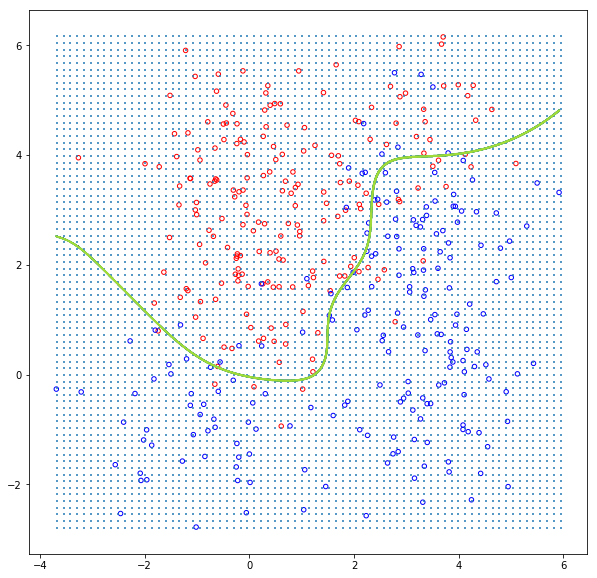

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.contour(X , Y ,  D )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=4, marker = 1)
plt.show()

## 거리 Matrix 생성

* 샘플과 Grid 사이의 거리 생성하기
* `cdist` 사용

In [43]:
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )


In [44]:
grid_xy = np.concatenate((x[:, : , np.newaxis],
                     y[:, : , np.newaxis]),
                    axis = 2)

In [45]:
reshape_grid = grid_xy.reshape(75*75 , 2)
print(total.shape , reshape_grid.shape)

(400, 2) (5625, 2)


In [46]:
metric = "euclidean"
dist = cdist( reshape_grid, total, metric=metric )

## 확인 
* 실제로 `eculidean` 기준으로 해서 잘 된 건지.

In [47]:
a = np.sqrt(np.sum(np.square(reshape_grid[0,:] - total[0,:])))
b = dist[0,0]
print(a==b)

True


# 예측하기

## 1: Blue , 0 : Red

* index > 200 , `Blue`
* index <= 200 , `Red`

##  color

* prob > 0.5 `Blue`
* prob < 0.5 `Red`
* prob == 0.5 `Black` (Decision Boundary)


In [48]:
k = 9
#arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
arg_min_k = pd.DataFrame(dist).apply(lambda x : np.argpartition(x , k)[ : k], axis=1).values
change_type = np.where(arg_min_k >= train_n  ,  1 , 0 )
prob = np.sum(change_type , axis = 1 ) / k
choice = np.where(prob > 0.5 , "blue" , np.where(prob < 0.5 , "red", "black"))
collections.Counter(choice)

Counter({'blue': 2947, 'red': 2678})

## Figure 3

### K 에 따른 Decision Boundary Line 생성

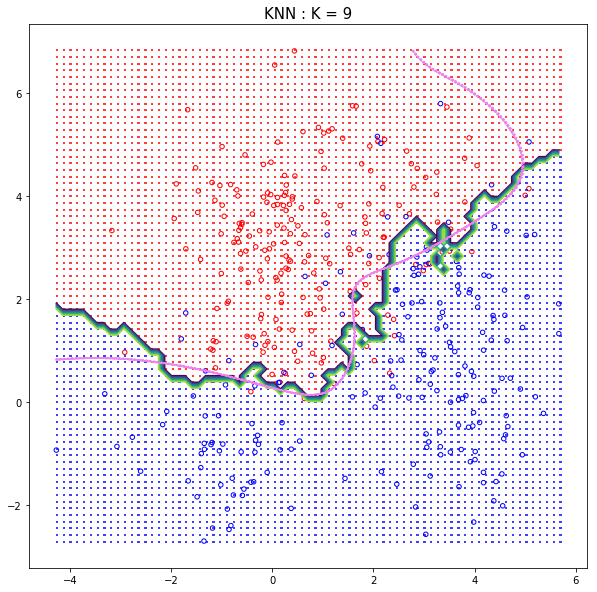

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
pp = np.where(np.array(prob).reshape(75 , 75) >= 0.5 , 1 , 0)
plt.contour(x , y , pp )
plt.contour(X , Y ,  D , colors='violet' , linestyles  ="dotted")
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=5, marker = 1 , c = choice)
plt.title("KNN : K = {}".format(k) , fontsize = 15)
plt.show()

<br>
<center><font size = 10>  Visualization KNN</font></center>
<br>
<br>

<div style = "text-align : center"><font size = 5 > K = 1 , 10 ,100</font></div>


In [23]:
def visual(k ,x ,y , sub , label) :
    arg_min_k = pd.DataFrame(dist).apply(lambda x : np.argpartition(x , k)[ : k], axis=1).values
    change_type = np.where(arg_min_k >= 200  ,  1 , 0 )
    prob = np.sum(change_type , axis = 1 ) / k
    choice = np.where(prob > 0.5 , "blue" ,
             np.where(prob < 0.5 , "red", "black"))
    pp = np.where(np.array(prob).reshape(75 , 75) >= 0.5 , 1 , 0)
    ax[sub].contour(x , y , pp )
    ax[sub].contour(X , Y ,  D , colors='violet' , linestyles  ="dotted")
    ax[sub].scatter(total[:,0] , total[:,1] ,
                s=20, facecolors='none', edgecolors= label )
    x = np.linspace(x_min , x_max , num = 75)
    y = np.linspace(y_min, y_max  , num = 75)
    x, y = np.meshgrid(x , y )
    ax[sub].scatter(x,y, s=5, marker = 1 , c = choice)
    ax[sub].set_title("KNN : K = {}".format(k) , fontsize = 40)
    ax[sub].axis('off')

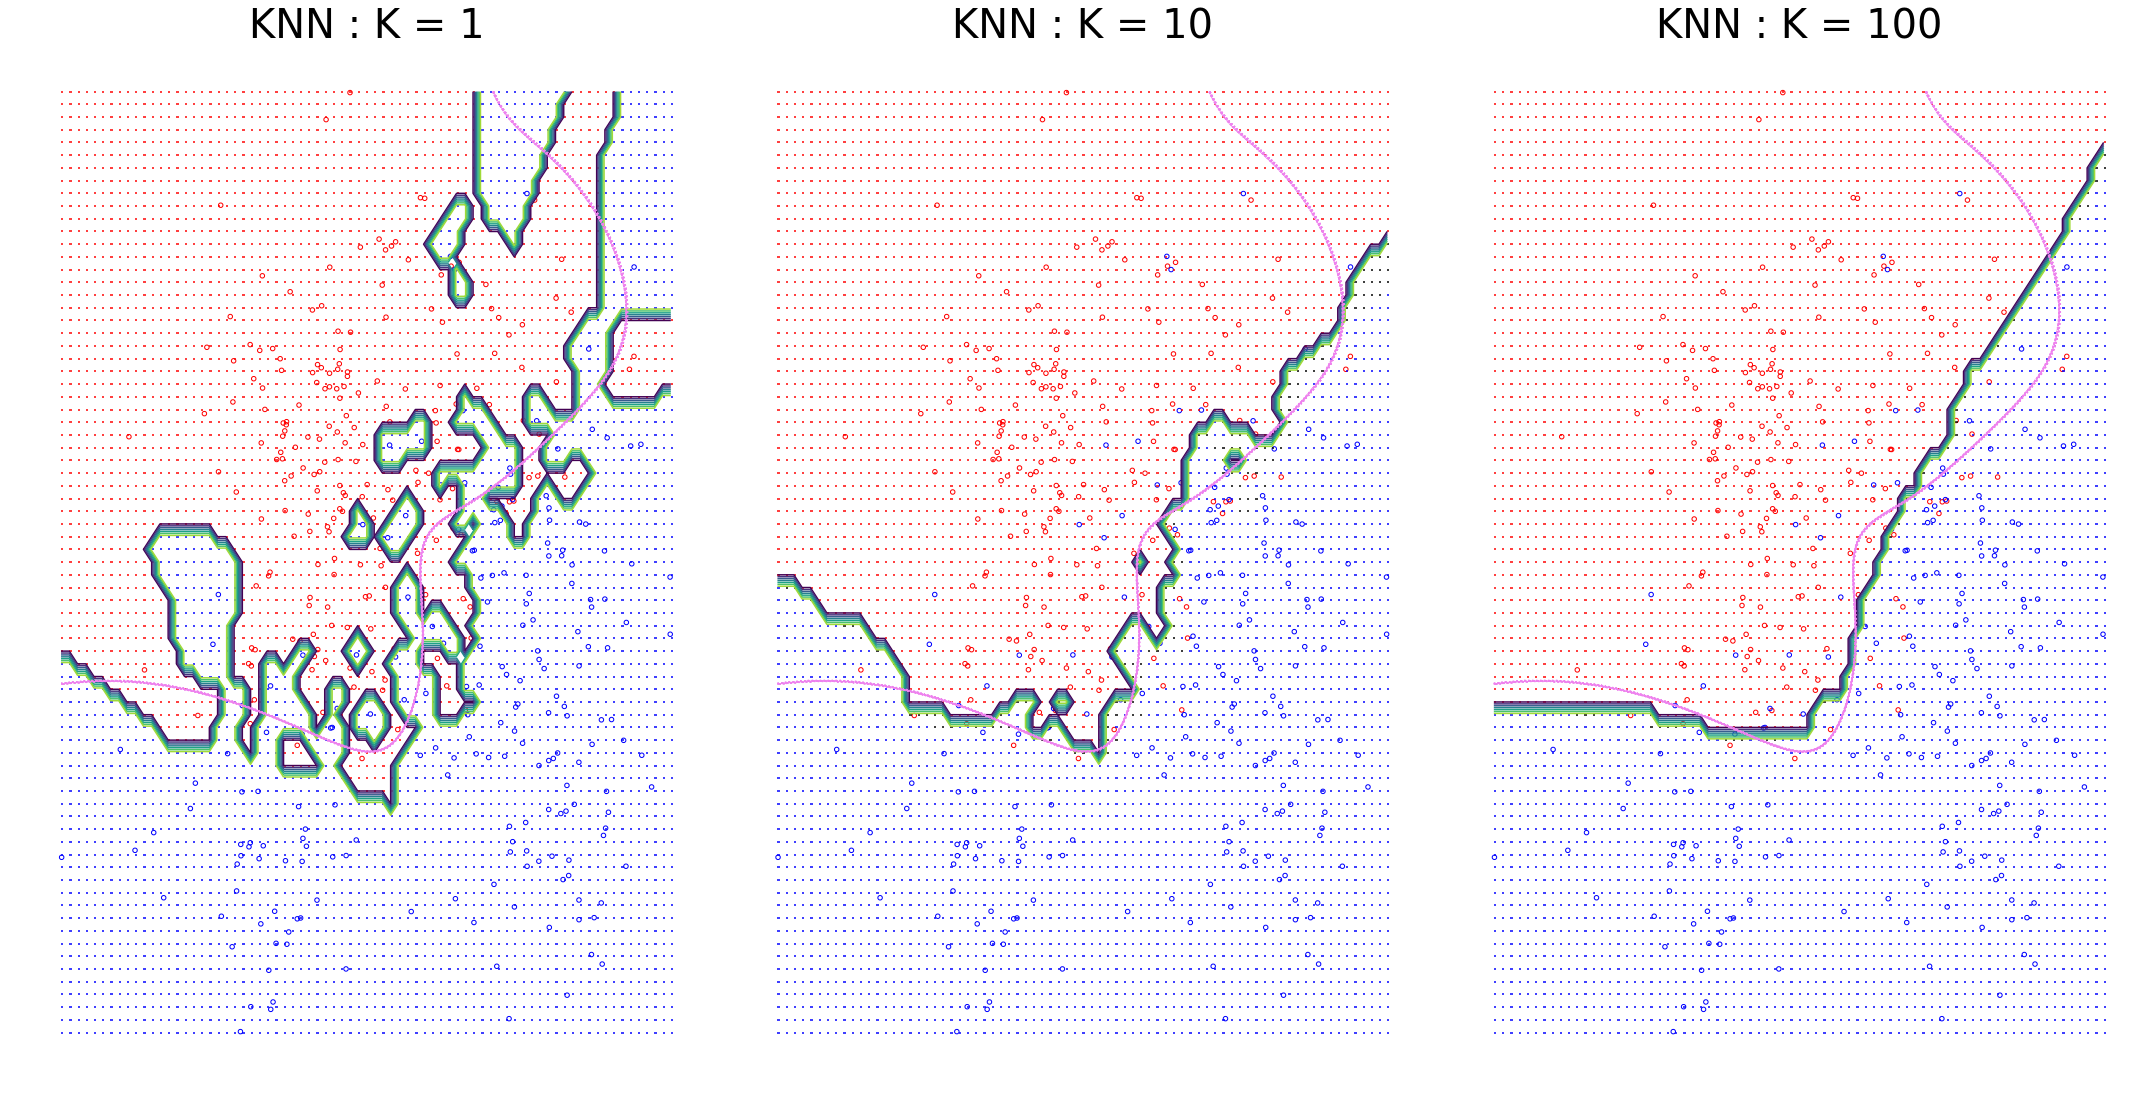

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1 , 3 , figsize = (30, 15))
fig.tight_layout()
sub = 0
for i in [1, 10, 100] : 
    visual(i ,x ,y , sub , train_label)
    sub +=1
plt.show()


<br>

<center>
    <font size = 7> 거리 재는 방법 시도  </font><br><br>
    <font size = 5> 1. cdist 함수 사용 /  5.43 ms </font><br><br>
    <font size = 5> 2. 이중 loop 하삼각행렬만 이용  / 28.1 ms </font><br><br>
    <font size = 5> 3. matrix 연산   / 3.68 s </font><br><br>

</center>

<center><font size = 4> 결론 : cdist가 가장 빠름. </font></center>

In [51]:
%%time 

metric = "euclidean"
dist_ex1 = cdist( total , total, metric=metric )


CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.21 ms


In [52]:
%%time

d = total[: ,np.newaxis ,:]  - total[np.newaxis , : , : ]
dist_ex2 = np.sqrt(np.sum( d**2, axis = 2))


CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 10.3 ms


In [53]:
%%time

null = np.zeros([total.shape[0] , total.shape[0]])

for i in np.arange(len(total)) :
    for j in np.arange( (i+1) , len(total)) :
        null[i,j] = np.sqrt(np.sum(np.square(total[i,:] - total[j,:])))


CPU times: user 824 ms, sys: 4 ms, total: 828 ms
Wall time: 817 ms


In [54]:
dist_ex3 = null + null.T

<center><font size = 5> 거리 실제로 다른지 비교</font></center>

In [55]:
print( "Check / dist_ex1 - dist_ex2 : {} , dist_ex3 - dist_ex1 : {}".format(np.sum(dist_ex1 - dist_ex2) , np.sum(dist_ex3 - dist_ex1)))

Check / dist_ex1 - dist_ex2 : 0.0 , dist_ex3 - dist_ex1 : 0.0


<br>
<center><font size = 6> Accuracy 측정 방법</font></center>

<br>

<center>
    
    1.k 숫자 만큼 가장 가까운 개수를 뽑는다.   
    2. 미리 정해 놓은 index를 바탕으로 분류한다. 
    3.  그리고 분류된 값의 확률값을 구한다. 
    4. `0.5` 기준으로 label을 나눈다. 
    5.  실제 train label가 얼마나 일치하는지 확인한다. 
</center>

<center><font size = 4> EX) K = 9 일 때, Train Accuracy 측정 </font></center>



In [58]:
n = train_n
k = 9
dist = pd.DataFrame(dist_ex1)
arg_min_k = dist.apply(lambda x : np.argpartition(x , k)[ 0: (k+ 0)], axis=1).values
change_type = np.where(arg_min_k >= n  ,  1 , 0 )
prob = np.sum(change_type , axis = 1 ) / k
choice = np.where(prob > 0.5 , "blue" ,
         np.where(prob < 0.5 , "red", "black"))
train_acc = np.sum(choice == np.array(train_label)) / len(train_label)

In [59]:
print(train_acc)

0.9025


In [68]:
def knn_acc(dist , k , train_n , label) :
    # 기존은 위의 방법, 밑에는 더 빠르게 하기위해 바꾼 방법.
    arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
    #arg_min_k = dist.apply(lambda x : np.argpartition(x , k)[ 0: (k+0)], axis=1).values
    change_type = np.where(arg_min_k >= train_n  ,  1 , 0 )
    prob = np.sum(change_type , axis = 1 ) / k
    choice = np.where(prob > 0.5 , "blue" ,
             np.where(prob < 0.5 , "red", "black"))
    train_acc = np.sum(choice == np.array(label)) / len(label)
    train_error = 1 - train_acc
    return train_error

In [69]:
%%time
3.49 -> 2.12
step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [3] + step
step = list(np.sort(step))
store = []
dist2 = cdist( total , total, metric=metric )
#dist2 = pd.DataFrame(dist)
for i in step :
    store.append(knn_acc(dist2 , i , train_n , train_label ))

CPU times: user 2.12 s, sys: 4 ms, total: 2.12 s
Wall time: 2.12 s


In [70]:
n = 2500
mix_1 = mixture_5(mean = mean , cov = cov , p =  p , N= n)
mix_2 = mixture_5(mean = mean , cov = cov , p =  p , N= n)
test_label = ["red"] * n  + ["blue"]  * n
test_data  = np.concatenate((mix_1 , mix_2), axis = 0)

metric = "euclidean"
dist = cdist( test_data , total , metric=metric )


In [71]:
%%time

test_store = []
#dist2 = pd.DataFrame(dist)
for i in step :
    test_store.append( knn_acc(dist , i  , train_n  , test_label ) )

CPU times: user 14.7 s, sys: 12 ms, total: 14.7 s
Wall time: 14.7 s


## 속도 개선 사항

* 구현 도중 좀 더 빠르게 하기 위해 시도

In [76]:
import time

k = 10

start_1 = time.time()
dd = pd.DataFrame(dist).apply(lambda x : np.argpartition(x , k )[ : k], axis=1)
end_1 = time.time()


start_2 = time.time()
arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
arg_min_k.shape
end_2 = time.time()

print("전 : {:.2f}초 --> 후 : {:.2f}초 ".format(end_1 - start_1 , end_2 - start_2))

전 : 1.61초 --> 후 : 0.47초 


In [72]:
step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [2] + step
step = list(np.sort(step))
step_reverse = list(1 / np.array(step))


trace = go.Scatter(
    x = step_reverse,
    y = store,
    mode = 'lines+markers',
    name ='Training Erros',
)
trace2 = go.Scatter(
    x = step_reverse,
    y = test_store,
    mode = 'lines+markers',
    name ='Test Errors',
)
trace_line = go.Scatter(
    x= step_reverse,
    y= [np.min(test_store)-0.01] * len(step),
    name = "minimum test error" , 
    mode ='lines'
)
data = [trace , trace2 , trace_line]

layout = dict(title = 'K-Nearest Neighbors',
              xaxis = dict(title = '1 / K'),
              yaxis = dict(title = 'Error Rates'),
              width=1000,
              height=700,
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-line')

/usr/local/lib/python3.5/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



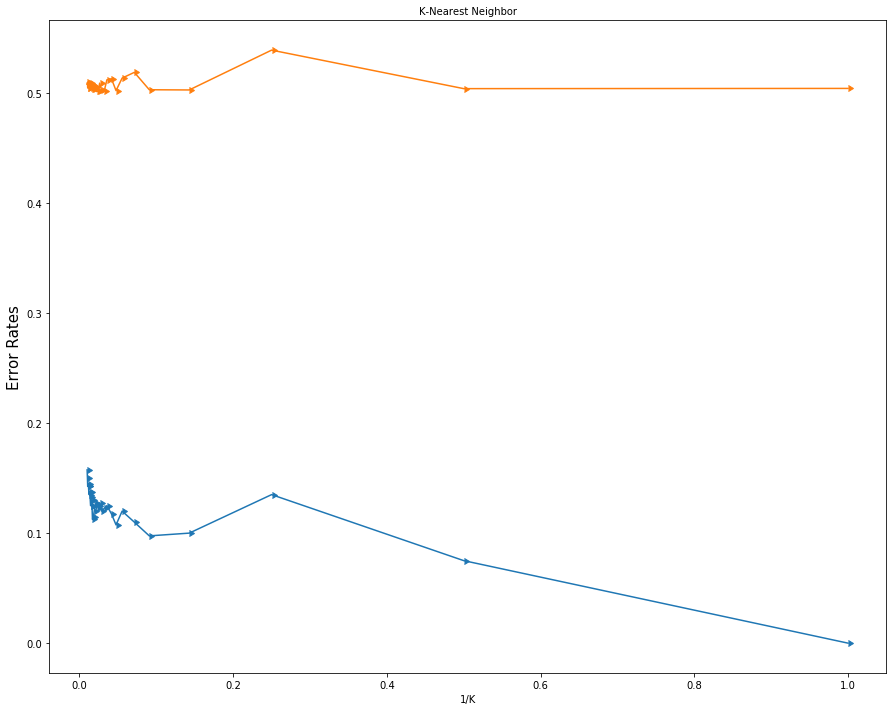

In [77]:
step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [2] + step
step = list(np.sort(step))
step_reverse = list(1 / np.array(step))
plt.figure(figsize=(15,12))
plt.plot(step_reverse , store , marker = 9 )
plt.plot(step_reverse , test_store , marker = 9)
plt.title("K-Nearest Neighbor", fontsize = 10)
plt.xlabel("1/K", fontsize = 10)
plt.ylabel("Error Rates", fontsize = 15)
plt.show()


## 참고

[시각화](https://github.com/sitzikbs/gmm_tutorial/blob/master/visualization.py)

[knn 구현 참고](http://dataaspirant.com/2016/12/27/k-nearest-neighbor-algorithm-implementaion-python-scratch/)

[knn 구현 참고 2](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

[knn 구현 참고 3](https://www.python-course.eu/k_nearest_neighbor_classifier.php)

[r contour 시각화](https://stats.stackexchange.com/questions/21572/how-to-plot-decision-boundary-of-a-k-nearest-neighbor-classifier-from-elements-o)

[knn Decision Boundaries plotly](https://plot.ly/scikit-learn/plot-voting-decision-regions/)

[numpy에서 replace 하는 방법](https://stackoverflow.com/questions/33529593/how-to-use-a-dictionary-to-translate-replace-elements-of-an-array)


[norm = LogNorm을 하니 그럴 듯하게 나온다.](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)
[matrix가 다를 때 거리재는 방법](https://stackoverflow.com/questions/1871536/minimum-euclidean-distance-between-points-in-two-different-numpy-arrays-not-wit)

[matrix 에서 가장 작은 것이나 큰 것 몇 개 가지고 오는 방법](https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array/27433395)